# test SVR module

In [1]:
import numpy as np
import pandas as pd
from sklearn import svm
from libsvm.svmutil import *
import matplotlib.pyplot as plt

In [2]:
train_x = np.array([np.arange(1000)]).T
train_y = np.sin(np.deg2rad(train_x[:,0]))

In [3]:
train_y.shape

(1000,)

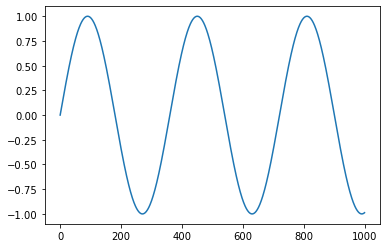

In [4]:
plt.plot(train_x,train_y)

In [5]:
test_x = np.array([np.arange(1000,2001)]).T
test_y = np.sin(np.deg2rad(test_x[:,0]))

## 利用林智仁教授的module進行測試

..................*.....*
optimization finished, #iter = 22563
epsilon = 0.000152
obj = -20.429946, rho = -0.039550
nSV = 654, nBSV = 0
Mean squared error = 0.472946 (regression)
Squared correlation coefficient = 0.0225189 (regression)


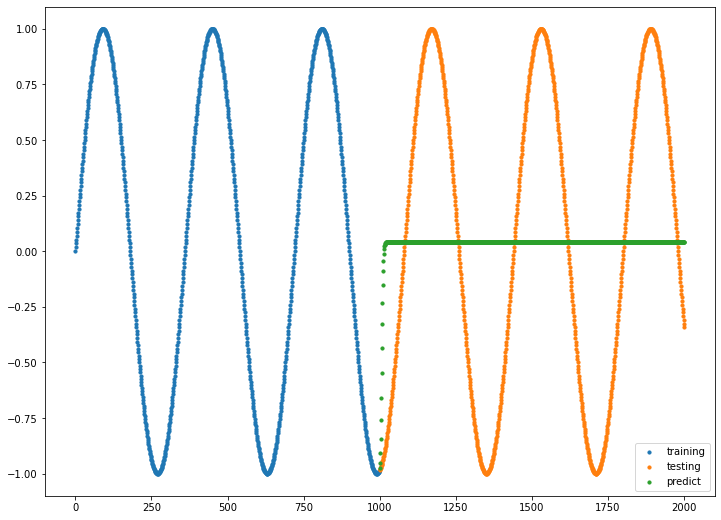

In [6]:
m = svm_train(train_y, train_x, '-s 4 -t 2 -c 100 -g 0.02')
p_label, p_acc, p_val = svm_predict(test_y, test_x, m)

fig, ax = plt.subplots(figsize=(12,9))
ax.scatter(train_x,train_y,s=10,label='training')
ax.scatter(test_x,test_y,s=10,label='testing')
ax.scatter(test_x,p_val,s=10,label='predict')
ax.legend(loc='lower right')
# ax.set_title('C=100')
plt.show()

In [7]:
# 模型參數
print(m.param)

svm_type: 4
 kernel_type: 2
 degree: 3
 gamma: 0.02
 coef0: 0.0
 cache_size: 100.0
 eps: 0.001
 C: 100.0
 nr_weight: 0
 weight_label: <importlib._bootstrap.LP_c_int object at 0x7f1a6fa2aec0>
 weight: <libsvm.svm.LP_c_double object at 0x7f1a6fa2af40>
 nu: 0.5
 p: 0.1
 shrinking: 1
 probability: 0


## 利用sklearn SVR套件進行測試

{'C': 100, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 0.02, 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
SVR(C=100, gamma=0.02)


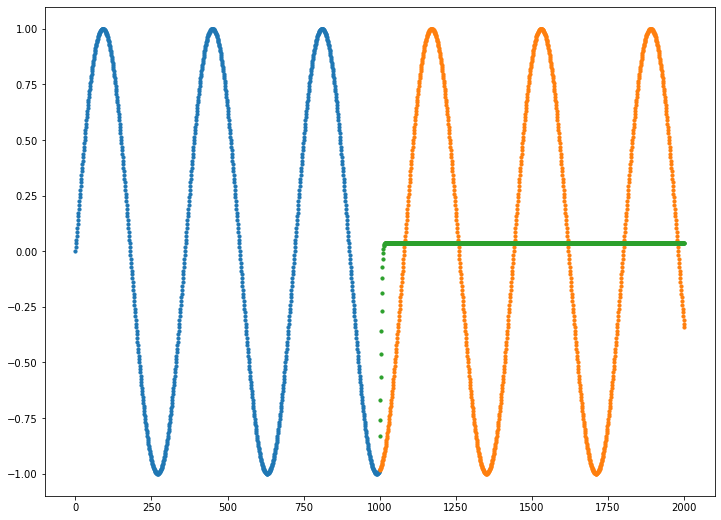

In [8]:
rbfModel=svm.SVR(kernel='rbf', gamma=0.02, C=100)
print(rbfModel.get_params())
# 使用訓練資料訓練模型
happy = rbfModel.fit(train_x, train_y)
print(happy)
# 使用訓練資料預測分類
predicted=rbfModel.predict(test_x)

fig, ax = plt.subplots(figsize=(12,9))
ax.scatter(train_x,train_y,s=10)
ax.scatter(test_x,test_y,s=10)
ax.scatter(test_x,predicted,s=10)
# ax.set_title('C=100')
plt.show()

{'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}


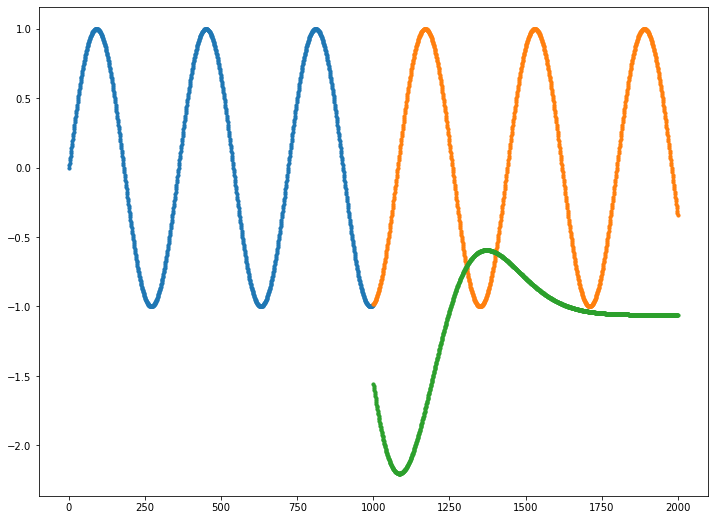

In [9]:
#%%
rbfModel=svm.SVR()
print(rbfModel.get_params())
# 使用訓練資料訓練模型
happy = rbfModel.fit(train_x, train_y)
# 使用訓練資料預測分類
predicted=rbfModel.predict(test_x)

fig, ax = plt.subplots(figsize=(12,9))
ax.scatter(train_x,train_y,s=10)
ax.scatter(test_x,test_y,s=10)
ax.scatter(test_x,predicted,s=10)
# ax.set_title('C=100')
plt.show()